# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
MY_PALLETE = sns.color_palette("colorblind")
sns.set_palette(MY_PALLETE)

In [3]:
MY_PALLETE

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

# Data

In [4]:
df = pd.read_csv("../pipeline_experiment_result.csv")
df

/tmp/ipykernel_6927/2620244375.py:1: DtypeWarning: Columns (19,20,60,200,201) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../pipeline_experiment_result.csv")


,seed_i,config_id,fold,config_hash,duration,start_time,end_time,status,seed,budget,...,classifier:sgd:power_t,feature_preprocessor:nystroem_sampler:coef0,feature_preprocessor:nystroem_sampler:degree,classifier:multinomial_nb:alpha,classifier:multinomial_nb:fit_prior,classifier:sgd:l1_ratio,dataset,data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction
0,0,0,1,34a76cf2da6c41f8646867818eea56d6,1.913694,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
1,0,0,2,34a76cf2da6c41f8646867818eea56d6,1.911491,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
2,0,0,3,34a76cf2da6c41f8646867818eea56d6,2.011853,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
3,0,0,4,34a76cf2da6c41f8646867818eea56d6,2.025221,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
4,0,0,5,34a76cf2da6c41f8646867818eea56d6,2.001899,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_40985,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037065,0,499,6,19a650aed428ed8e5fe1619c61bc7118,6.627506,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037066,0,499,7,19a650aed428ed8e5fe1619c61bc7118,6.571584,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037067,0,499,8,19a650aed428ed8e5fe1619c61bc7118,6.475392,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037068,0,499,9,19a650aed428ed8e5fe1619c61bc7118,6.478533,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN


In [5]:
df.shape

(1037070, 203)

In [6]:
df.columns.to_list()

['seed_i',
 'config_id',
 'fold',
 'config_hash',
 'duration',
 'start_time',
 'end_time',
 'status',
 'seed',
 'budget',
 'balancing:strategy',
 'classifier:__choice__',
 'data_preprocessor:__choice__',
 'feature_preprocessor:__choice__',
 'classifier:passive_aggressive:C',
 'classifier:passive_aggressive:average',
 'classifier:passive_aggressive:fit_intercept',
 'classifier:passive_aggressive:loss',
 'classifier:passive_aggressive:tol',
 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy',
 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__',
 'feature_preprocessor:select_percentile_classification:percentile',
 'feature_preprocessor:select_percentile_classification:score_func',
 'accuracy_train',
 'balanced_accuracy_train',
 'f1_macro_train',
 'f1_weighted_train',
 'precision_macro_train',
 'precision_weighted_train',
 'recall_macro_train',
 'recall_weighted_train',
 'accuracy_val',
 'balanced_accuracy_val',
 'f1_macro_val',
 'f1_weighte

In [7]:
mask = df["dataset"] == "dataset_1161"
df[mask]

,seed_i,config_id,fold,config_hash,duration,start_time,end_time,status,seed,budget,...,classifier:sgd:power_t,feature_preprocessor:nystroem_sampler:coef0,feature_preprocessor:nystroem_sampler:degree,classifier:multinomial_nb:alpha,classifier:multinomial_nb:fit_prior,classifier:sgd:l1_ratio,dataset,data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__,data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction
1032070,0,0,1,34a76cf2da6c41f8646867818eea56d6,3.238510,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1032071,0,0,2,34a76cf2da6c41f8646867818eea56d6,3.207381,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1032072,0,0,3,34a76cf2da6c41f8646867818eea56d6,3.197151,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1032073,0,0,4,34a76cf2da6c41f8646867818eea56d6,3.315667,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1032074,0,0,5,34a76cf2da6c41f8646867818eea56d6,3.313449,1.680580e+09,1.680580e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037065,0,499,6,19a650aed428ed8e5fe1619c61bc7118,6.627506,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037066,0,499,7,19a650aed428ed8e5fe1619c61bc7118,6.571584,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037067,0,499,8,19a650aed428ed8e5fe1619c61bc7118,6.475392,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN
1037068,0,499,9,19a650aed428ed8e5fe1619c61bc7118,6.478533,1.680869e+09,1.680869e+09,StatusType.SUCCESS,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,dataset_1161,NaN,NaN,NaN


In [8]:
df["status"].value_counts()

status
StatusType.SUCCESS    810556
StatusType.CRASHED    180077
StatusType.MEMOUT      26775
StatusType.TIMEOUT     19662
Name: count, dtype: int64

# Exploratory Data Analysis on Pipeline Compositions

## Train/Test/Validation distribution

In [9]:
set_list = [
    "train",
    "test",
    "val"
]

performance_list = [
 'accuracy',
 'balanced_accuracy',
 'f1_macro',
 'f1_weighted',
 'precision_macro',
 'precision_weighted',
 'recall_macro',
 'recall_weighted',
]

reg_set_list = "_"+"|_".join(set_list)
reg_performance_list = "_|".join(performance_list)+"_"
all_performance_list = [ i+"_"+j for i in performance_list for j in set_list]

aux = df[all_performance_list].melt(var_name='type', value_name='performance')
aux = aux.assign(measure=aux["type"].str.split(pat=reg_set_list, expand=True)[0])
aux = aux.assign(set=aux["type"].str.split(pat=reg_performance_list, expand=True)[1])

In [10]:
aux

,type,performance,measure,set
0,accuracy_train,0.030808,accuracy,train
1,accuracy_train,0.030808,accuracy,train
2,accuracy_train,0.030808,accuracy,train
3,accuracy_train,0.030808,accuracy,train
4,accuracy_train,0.030808,accuracy,train
...,...,...,...,...
24889675,recall_weighted_val,0.862069,recall_weighted,val
24889676,recall_weighted_val,0.853448,recall_weighted,val
24889677,recall_weighted_val,0.862069,recall_weighted,val
24889678,recall_weighted_val,0.869565,recall_weighted,val


In [12]:
def plot_histograms(set_list, performance_list):
    step_size = 6
    ncols = len(set_list) + 1
    nrows = 1

    for row, measure in enumerate(performance_list):
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(step_size*ncols, step_size*nrows))
        idx_measure = aux["measure"] == measure
        
        for col, set in enumerate(set_list):
            idx_set = aux["set"] == set
            sns.histplot(
                data=aux[idx_measure & idx_set],
                x="performance",
                hue="set",
                kde=True,
                palette=[sns.color_palette().as_hex()[col]],
                ax=axs[col]
            )
            axs[col].set(xlabel=measure)
    
        col+=1
        idx_set = aux["set"].isin(set_list)
        sns.kdeplot(
            data=aux[idx_measure],
            x="performance",
            hue="set", ax=axs[col],
        )
        axs[col].set(xlabel=measure)
        
        fig.savefig("histogram_"+"_".join(set_list)+f"_{measure}.pdf") 
        plt.show()

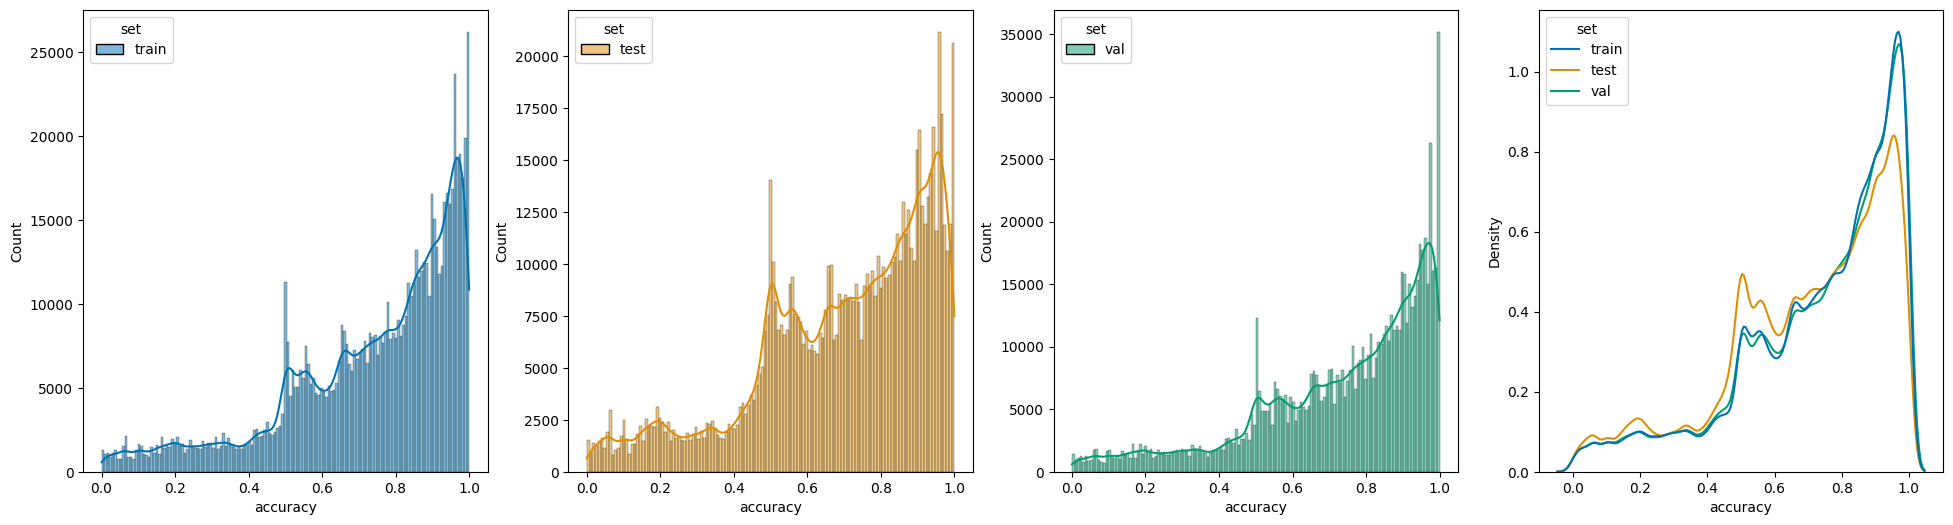

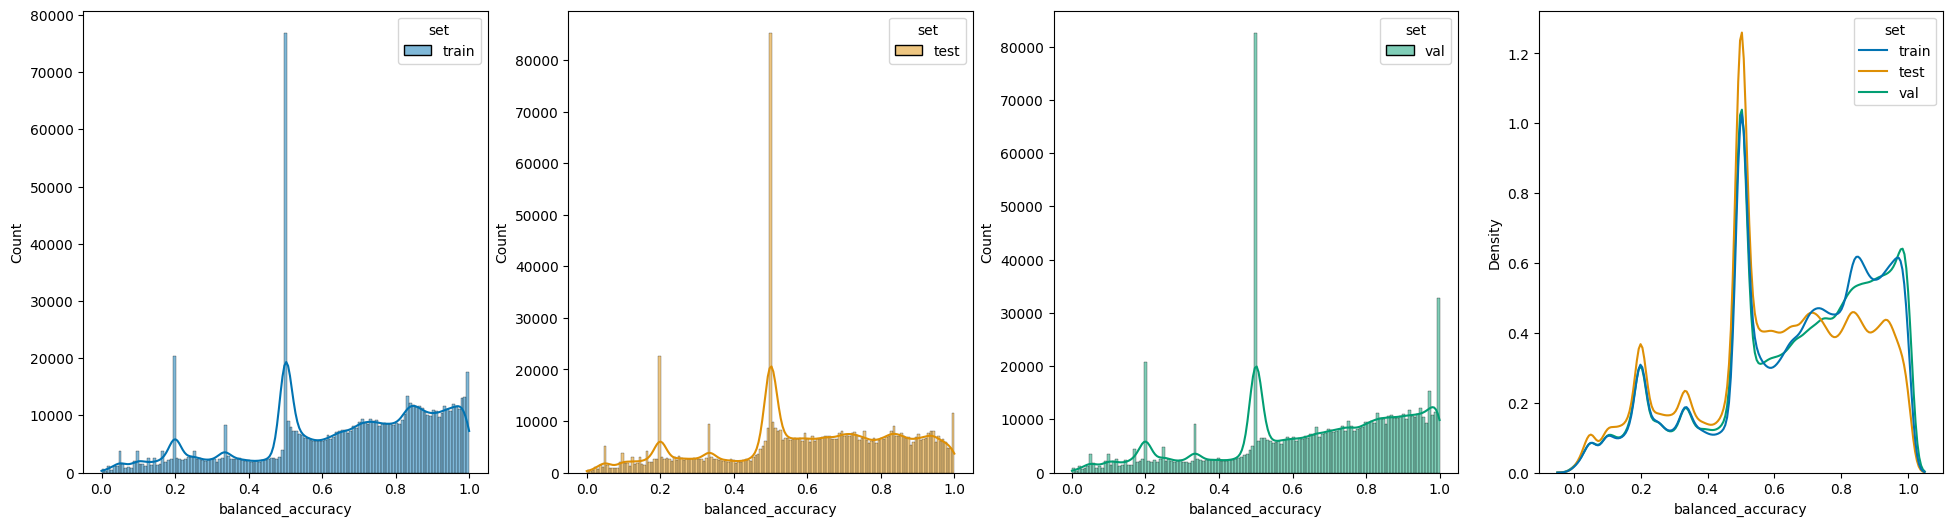

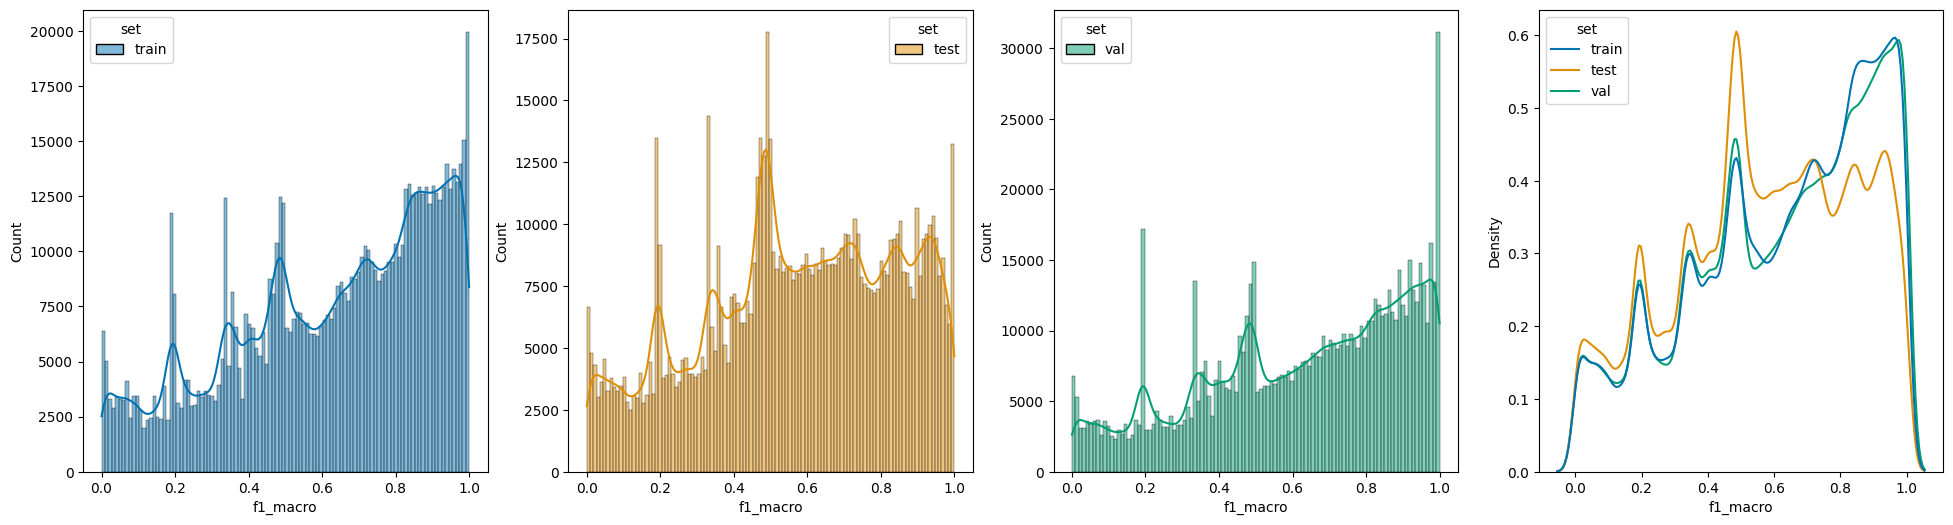

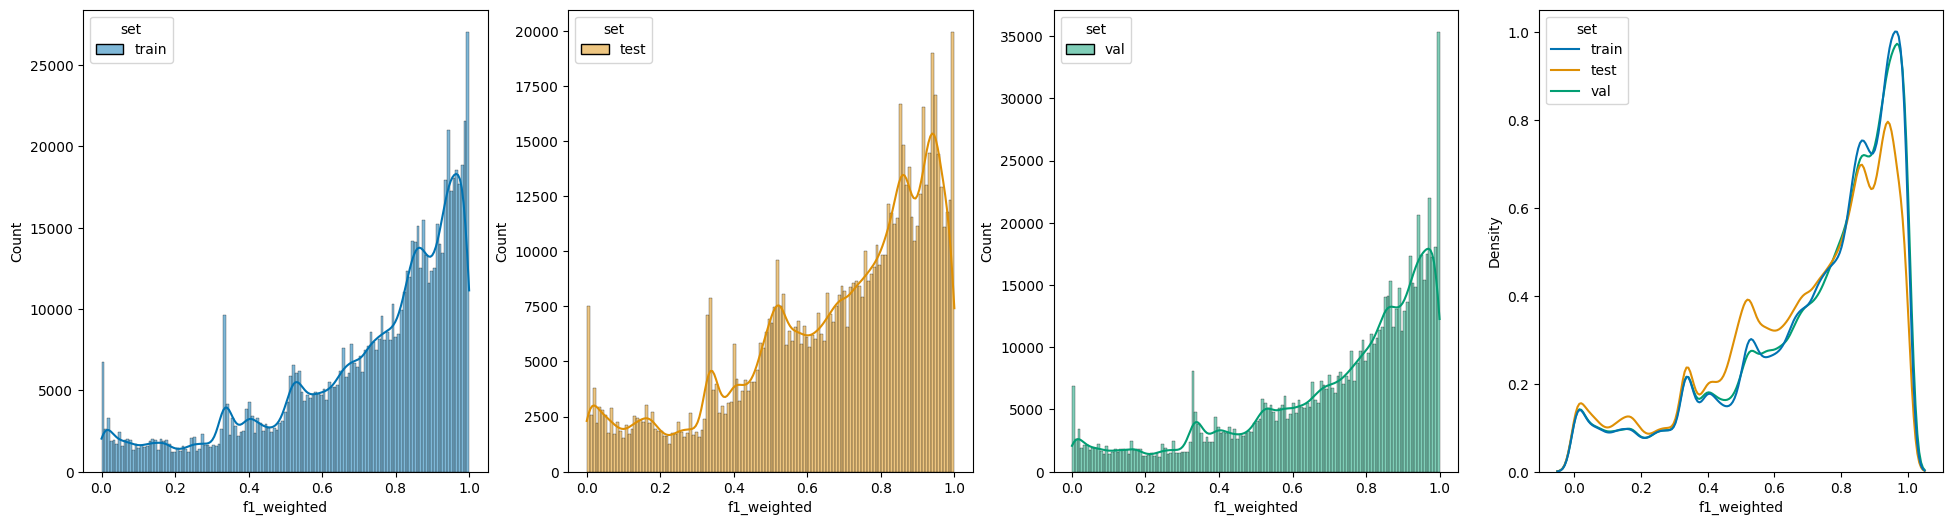

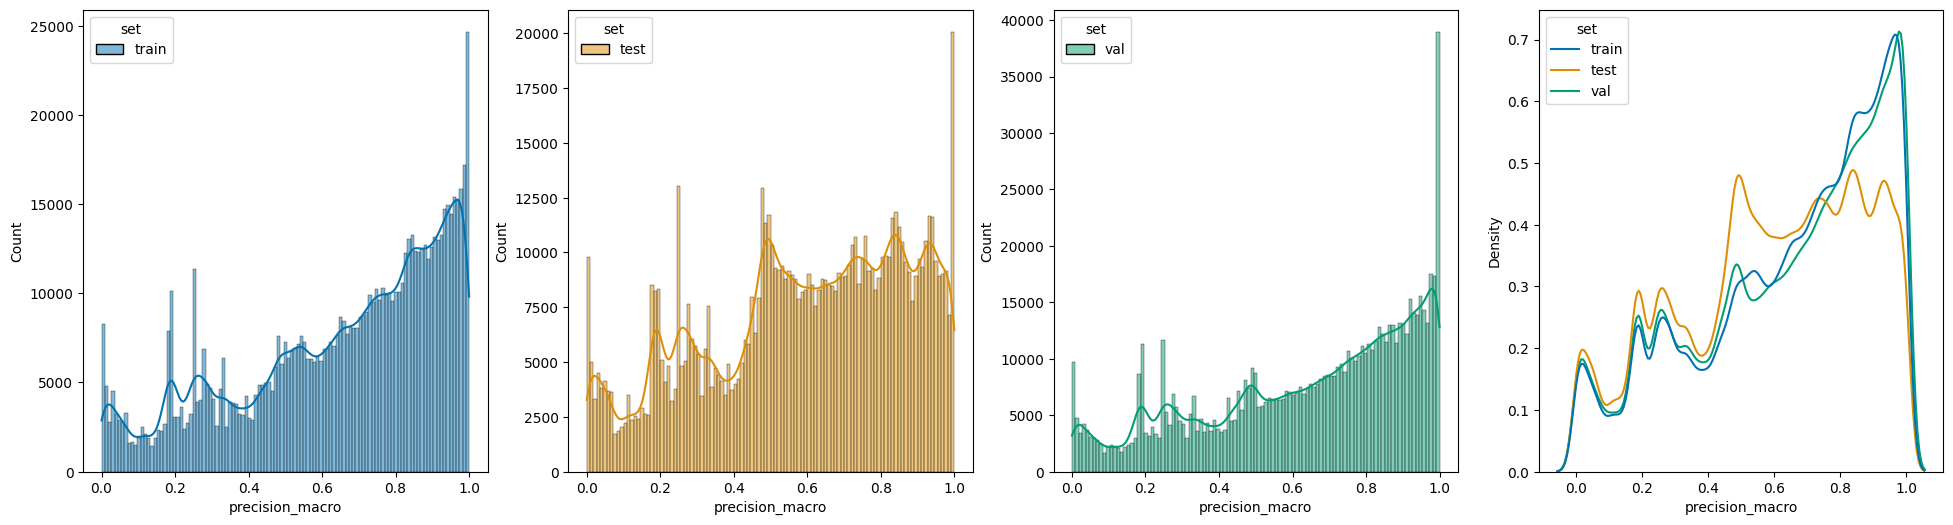

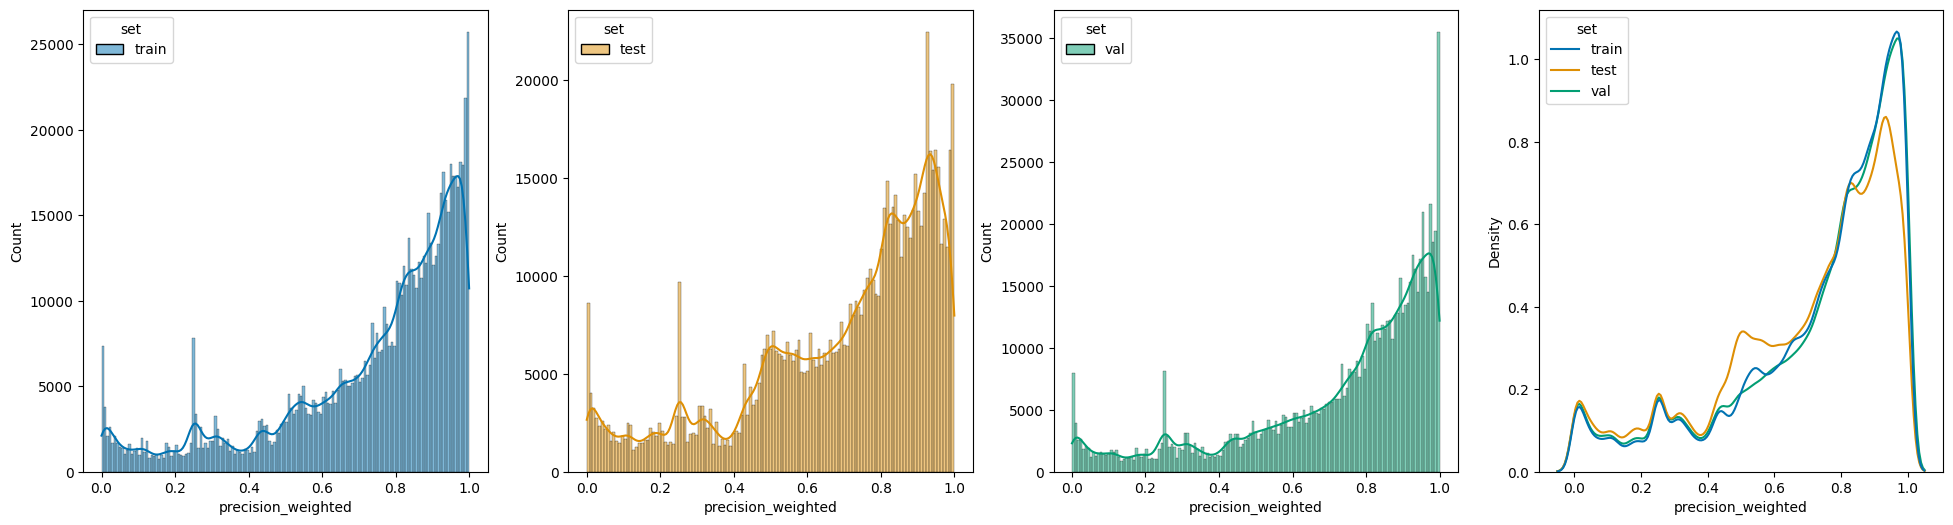

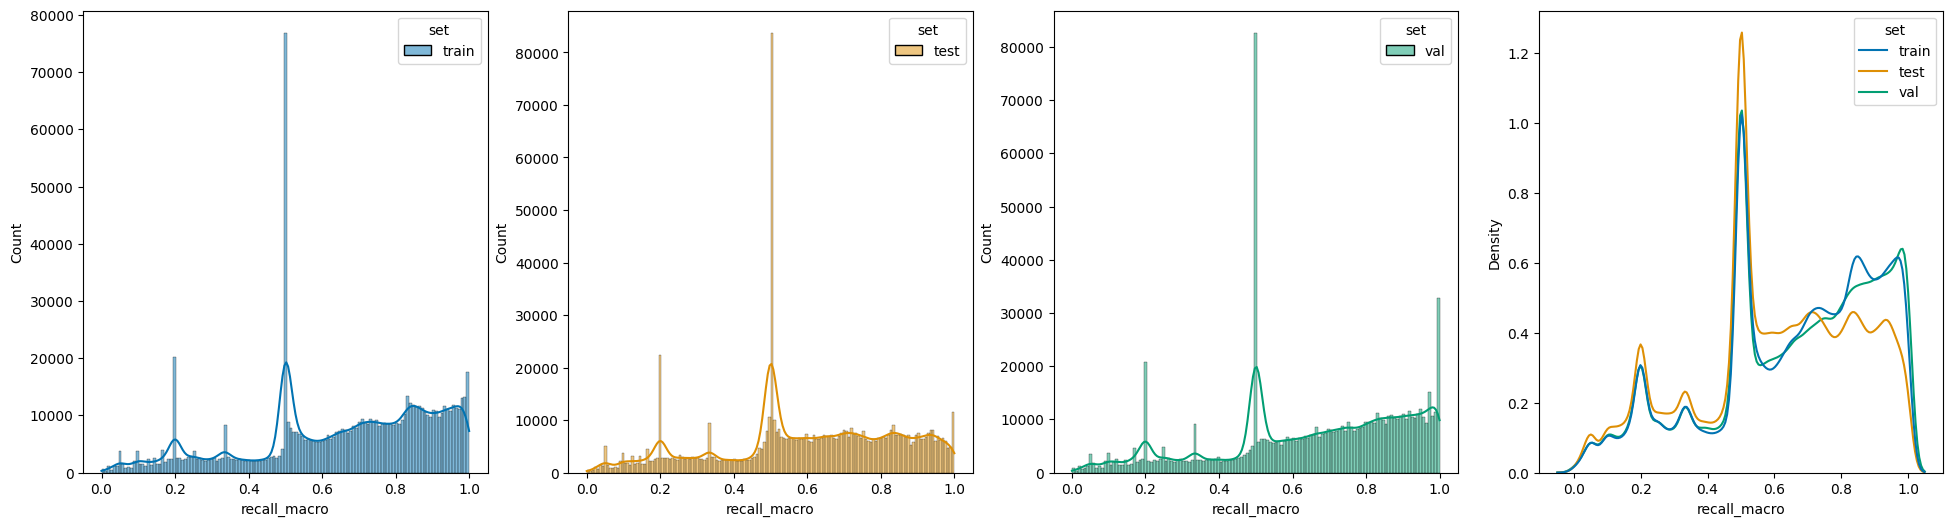

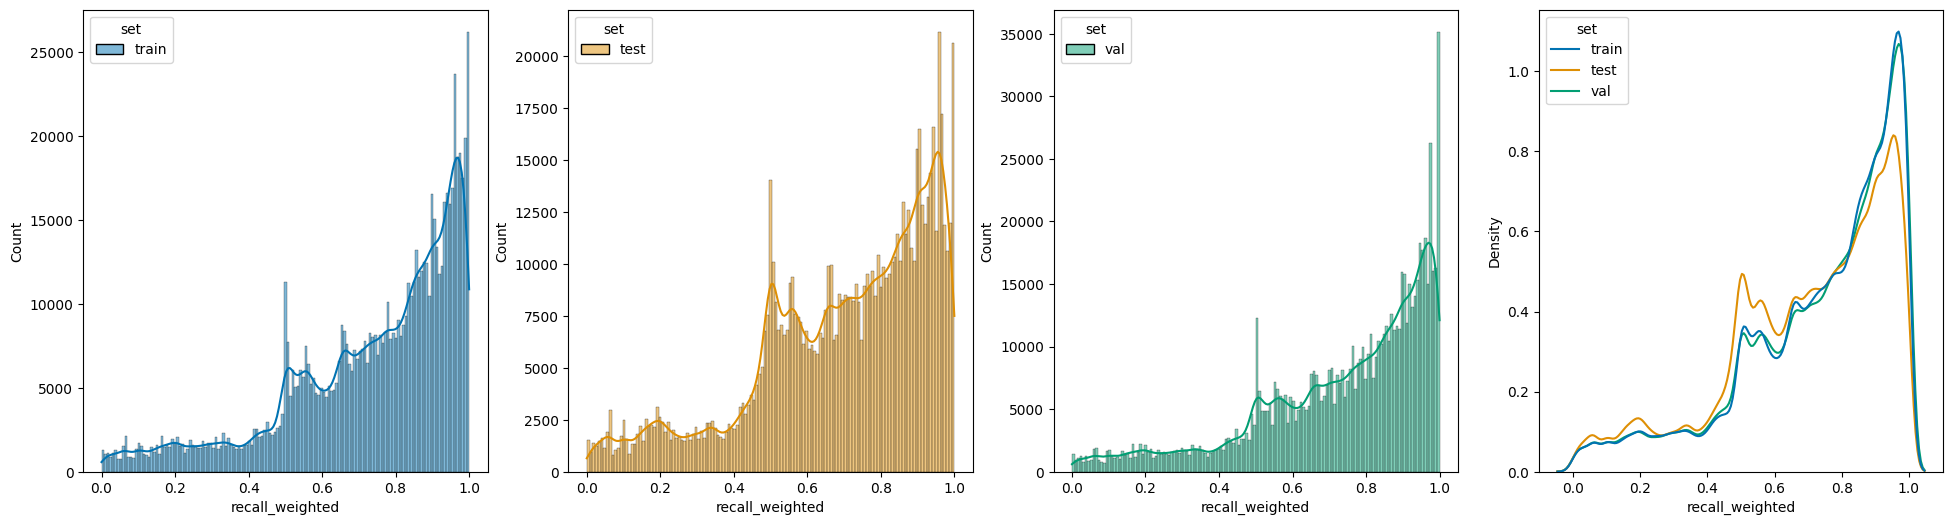

In [13]:
plot_histograms(set_list, performance_list)

In [14]:
# plot_histograms_group(set_list, performance_list)

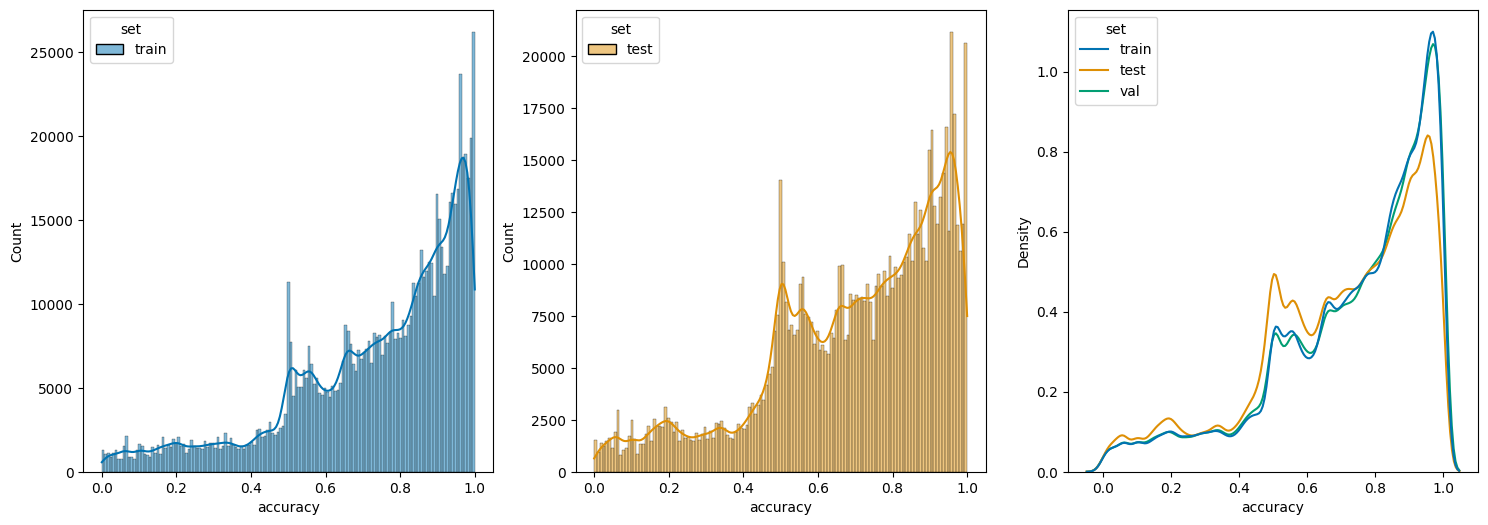

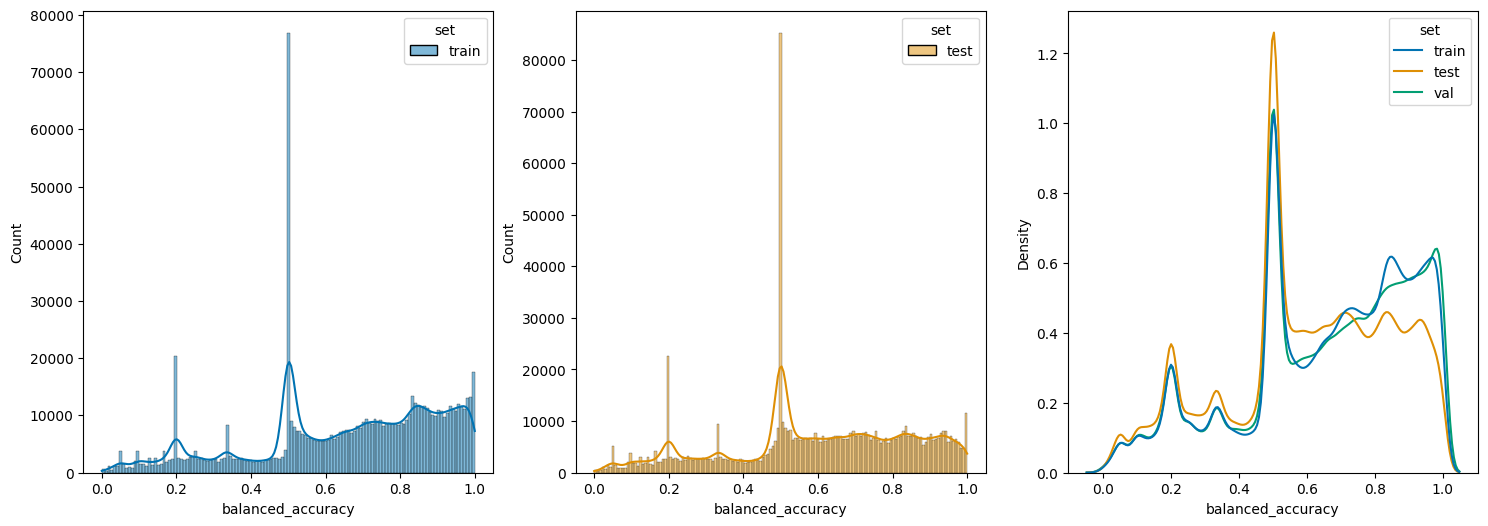

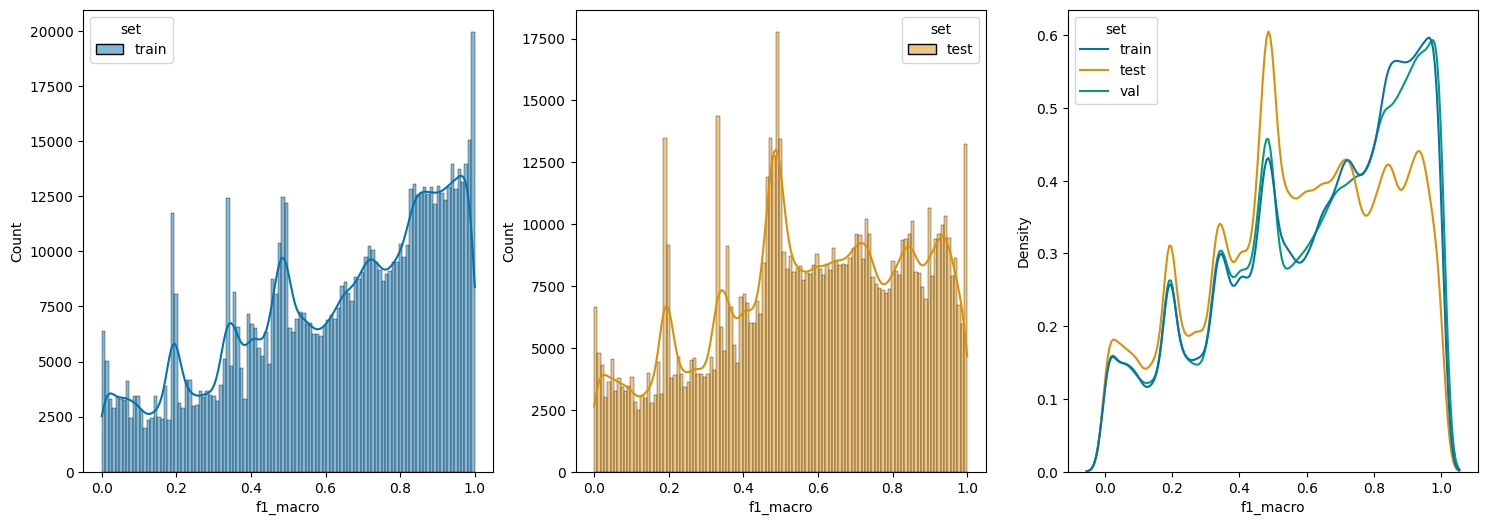

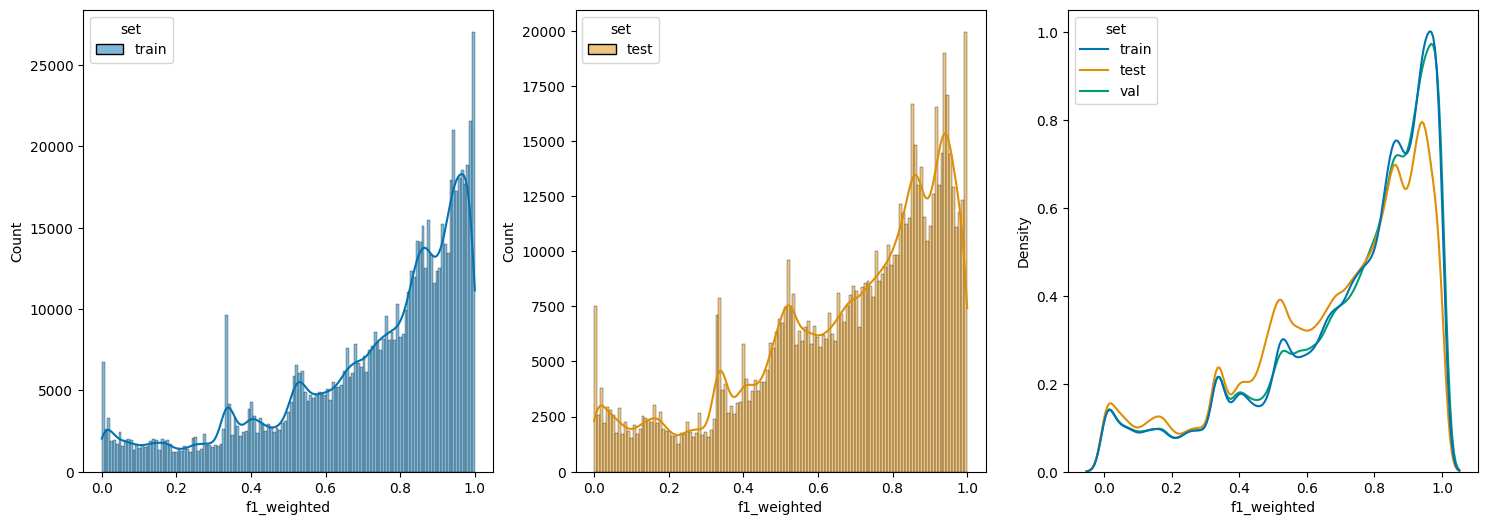

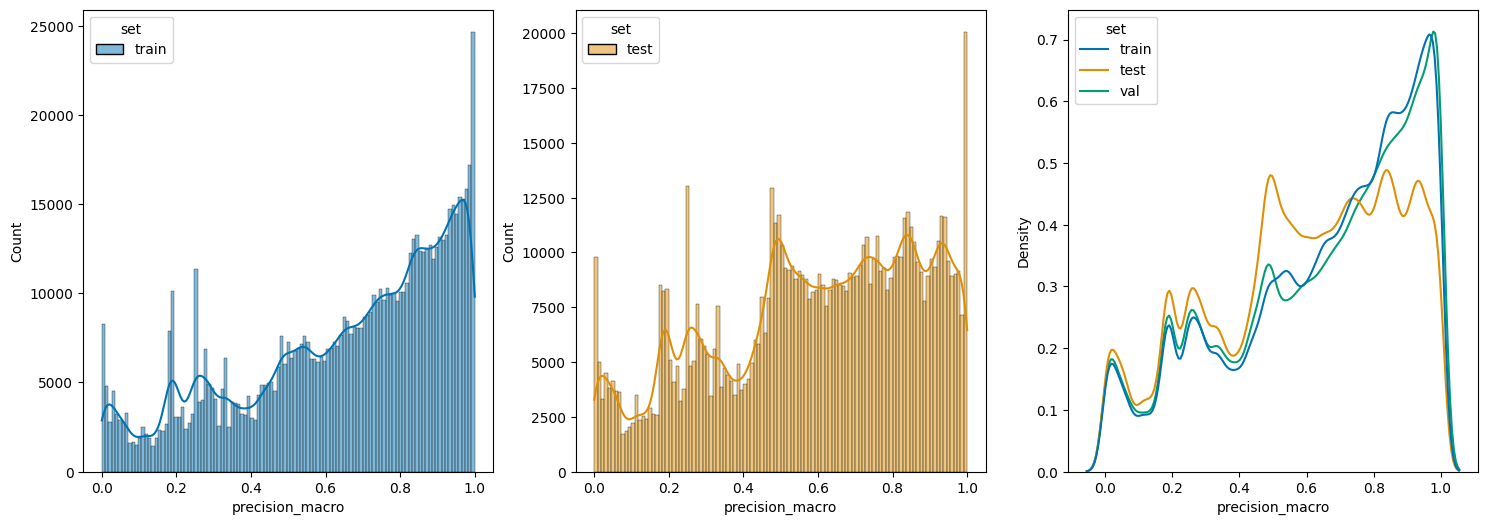

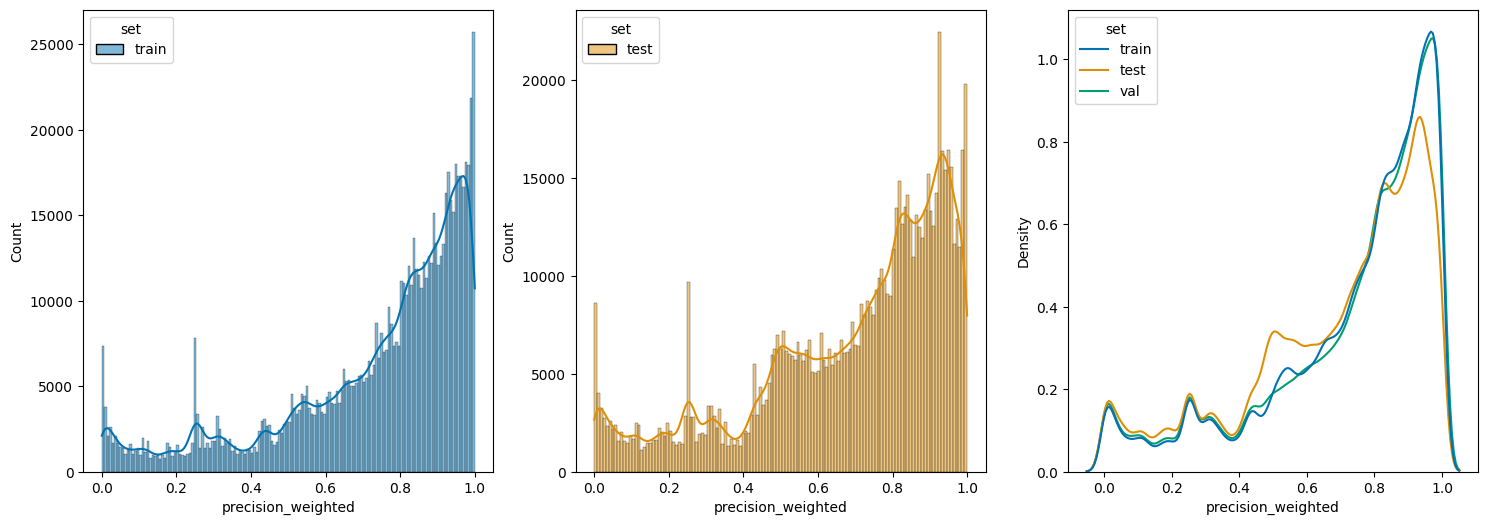

In [ ]:
plot_histograms(["train", "test"], performance_list)

In [ ]:
# plot_histograms_group(["train", "test"], performance_list)

## Train/Test/Validation Statistics

In [11]:
df_statistics = aux.groupby(["set", "measure"]).describe()
df_statistics

performance                                     \
                               count      mean       std  min       25%   
set   measure                                                             
test  accuracy              810556.0  0.694282  0.240046  0.0  0.544000   
      balanced_accuracy     810556.0  0.601378  0.243834  0.0  0.489605   
      f1_macro              810556.0  0.571613  0.265802  0.0  0.381959   
      f1_weighted           810556.0  0.672228  0.260887  0.0  0.512253   
      precision_macro       810556.0  0.590667  0.271573  0.0  0.396229   
      precision_weighted    810556.0  0.688000  0.261524  0.0  0.534146   
      recall_macro          810556.0  0.600761  0.244101  0.0  0.487500   
      recall_weighted       810556.0  0.694282  0.240046  0.0  0.544000   
train accuracy              810556.0  0.733272  0.234869  0.0  0.596555   
      balanced_accuracy     810556.0  0.655350  0.247726  0.0  0.500000   
      f1_macro              810556.0  0.625224  0.273735  0.0  0.429486   
      f1_weighted           810556.0  0.712775  0.258295  0.0  0.567227   
      precision_macro       810556.0  0.647892  0.275807  0.0  0.465596   
      precision_weighted    810556.0  0.731535  0.254917  0.0  0.613669   
      recall_macro          810556.0  0.654935  0.248067  0.0  0.500000   
      recall_weighted       810556.0  0.733272  0.234869  0.0  0.596555   
val   accuracy              810556.0  0.733270  0.236507  0.0  0.594595   
      balanced_accuracy     810556.0  0.655878  0.251170  0.0  0.500000   
      f1_macro              810556.0  0.624095  0.276223  0.0  0.423589   
      f1_weighted           810556.0  0.711970  0.260123  0.0  0.565498   
      precision_macro       810556.0  0.642236  0.281988  0.0  0.445046   
      precision_weighted    810556.0  0.728367  0.260695  0.0  0.604938   
      recall_macro          810556.0  0.655002  0.251719  0.0  0.500000   
      recall_weighted       810556.0  0.733270  0.236507  0.0  0.594595   

                                                   
                               50%       75%  max  
set   measure                                      
test  accuracy            0.744136  0.896344  1.0  
      balanced_accuracy   0.605082  0.804103  1.0  
      f1_macro            0.584939  0.797254  1.0  
      f1_weighted         0.738798  0.884924  1.0  
      precision_macro     0.620281  0.822533  1.0  
      precision_weighted  0.768625  0.896526  1.0  
      recall_macro        0.604859  0.803691  1.0  
      recall_weighted     0.744136  0.896344  1.0  
train accuracy            0.799074  0.923077  1.0  
      balanced_accuracy   0.697837  0.863081  1.0  
      f1_macro            0.677654  0.862350  1.0  
      f1_weighted         0.795694  0.918892  1.0  
      precision_macro     0.715063  0.880595  1.0  
      precision_weighted  0.818886  0.926105  1.0  
      recall_macro        0.697837  0.863054  1.0  
      recall_weighted     0.799074  0.923077  1.0  
val   accuracy            0.800000  0.924686  1.0  
      balanced_accuracy   0.693277  0.869898  1.0  
      f1_macro            0.672512  0.865460  1.0  
      f1_weighted         0.795060  0.919864  1.0  
      precision_macro     0.709107  0.884099  1.0  
      precision_weighted  0.817437  0.927952  1.0  
      recall_macro        0.692436  0.869748  1.0  
      recall_weighted     0.800000  0.924686  1.0

In [12]:
df_statistics.to_csv("overal_train_val_test_statistics.csv")